# Lab work #1
# First Name, Last Name
# Group No

# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


In [10]:
df = pd.read_csv("Arrest_Data_from_2020_to_Present.csv")
df.head()
df = df.dropna()
df = df.drop_duplicates()
df_small = df.sample(n=1000, random_state=42) #clamp, because too large
categorical_cols = ['Report Type', 'Area Name', 'Sex Code', 'Descent Code',
                    'Charge Group Description', 'Arrest Type Code', 'Disposition Description',
                    'Charge Description', 'Booking Location']
numerical_cols = ['Age', 'Area ID', 'Reporting District', 'LAT', 'LON']
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
])
processed = preprocessor.fit_transform(df_small)

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = numerical_cols + cat_features.tolist()
clean_df = pd.DataFrame(processed, columns=all_columns)
clean_df.to_csv("cleaned_dataset.csv", index=False)

## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("cleaned_dataset.csv")



In [12]:
stats = df.describe().T
stats['median'] = df.median()
stats['mode'] = df.mode().iloc[0]
print(stats[['mean', 'median', 'mode', 'std']])

                                                mean    median      mode  \
Age                                     1.882938e-16 -0.228481 -0.760451   
Area ID                                -1.492140e-16  0.205800  0.369393   
Reporting District                     -6.750156e-17  0.184715 -0.354470   
LAT                                     2.202682e-16  0.082419  0.132385   
LON                                    -1.036504e-15 -0.086380 -0.084251   
...                                              ...       ...       ...   
Booking Location_HARBOR                 1.300000e-02  0.000000  0.000000   
Booking Location_HOLLYWOOD              8.800000e-02  0.000000  0.000000   
Booking Location_METRO - JAIL DIVISION  3.120000e-01  0.000000  0.000000   
Booking Location_PACIFIC                4.300000e-02  0.000000  0.000000   
Booking Location_VALLEY - JAIL DIV      2.750000e-01  0.000000  0.000000   

                                             std  
Age                                 

<Figure size 600x600 with 0 Axes>

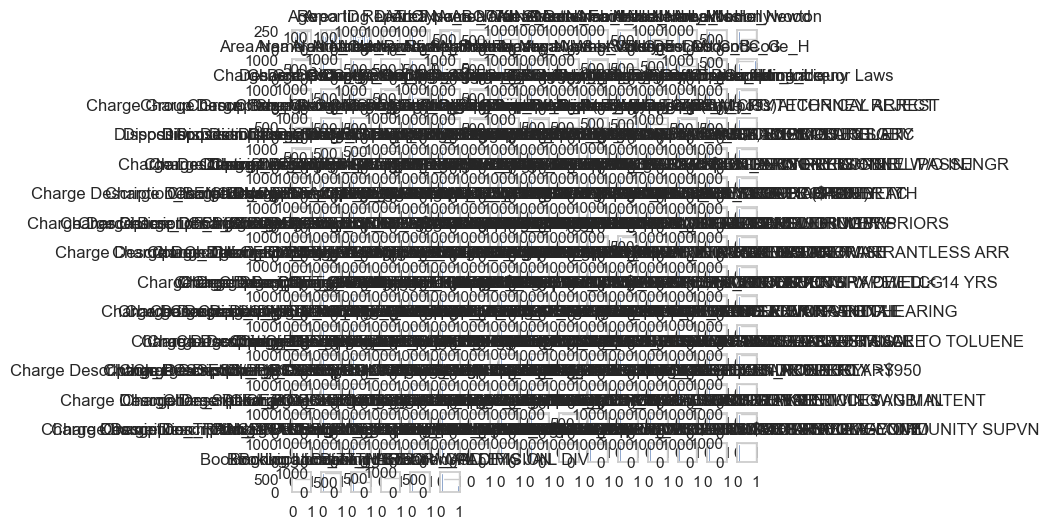

In [16]:

plt.figure(figsize=(16, 12))
df.hist(bins=30, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

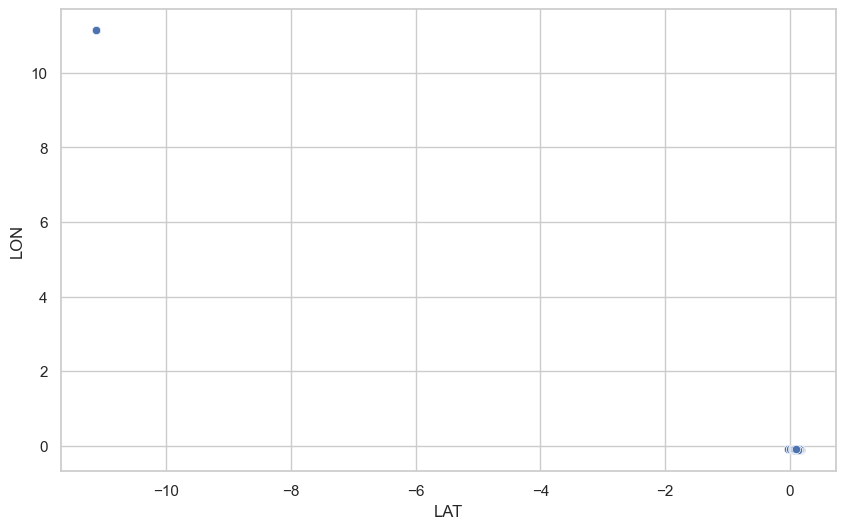

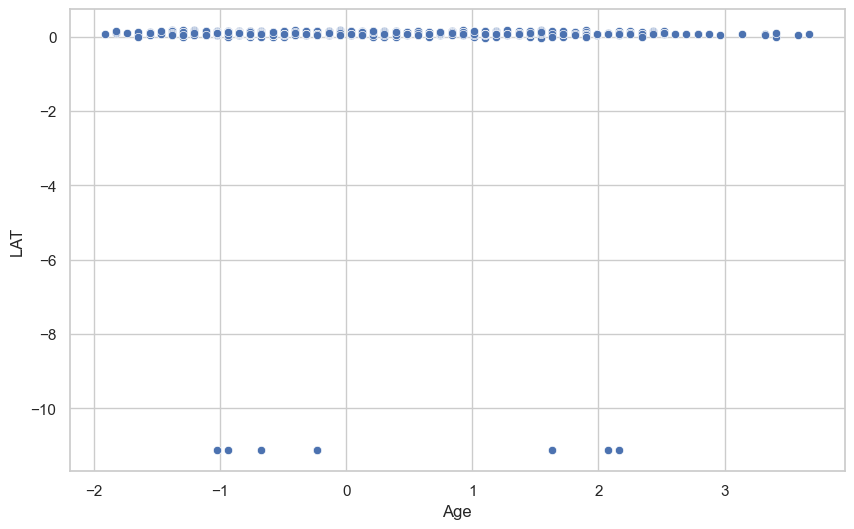

In [17]:
sns.scatterplot(data=df, x='LAT', y='LON')
plt.show()

sns.scatterplot(data=df, x='Age', y='LAT')
plt.show()

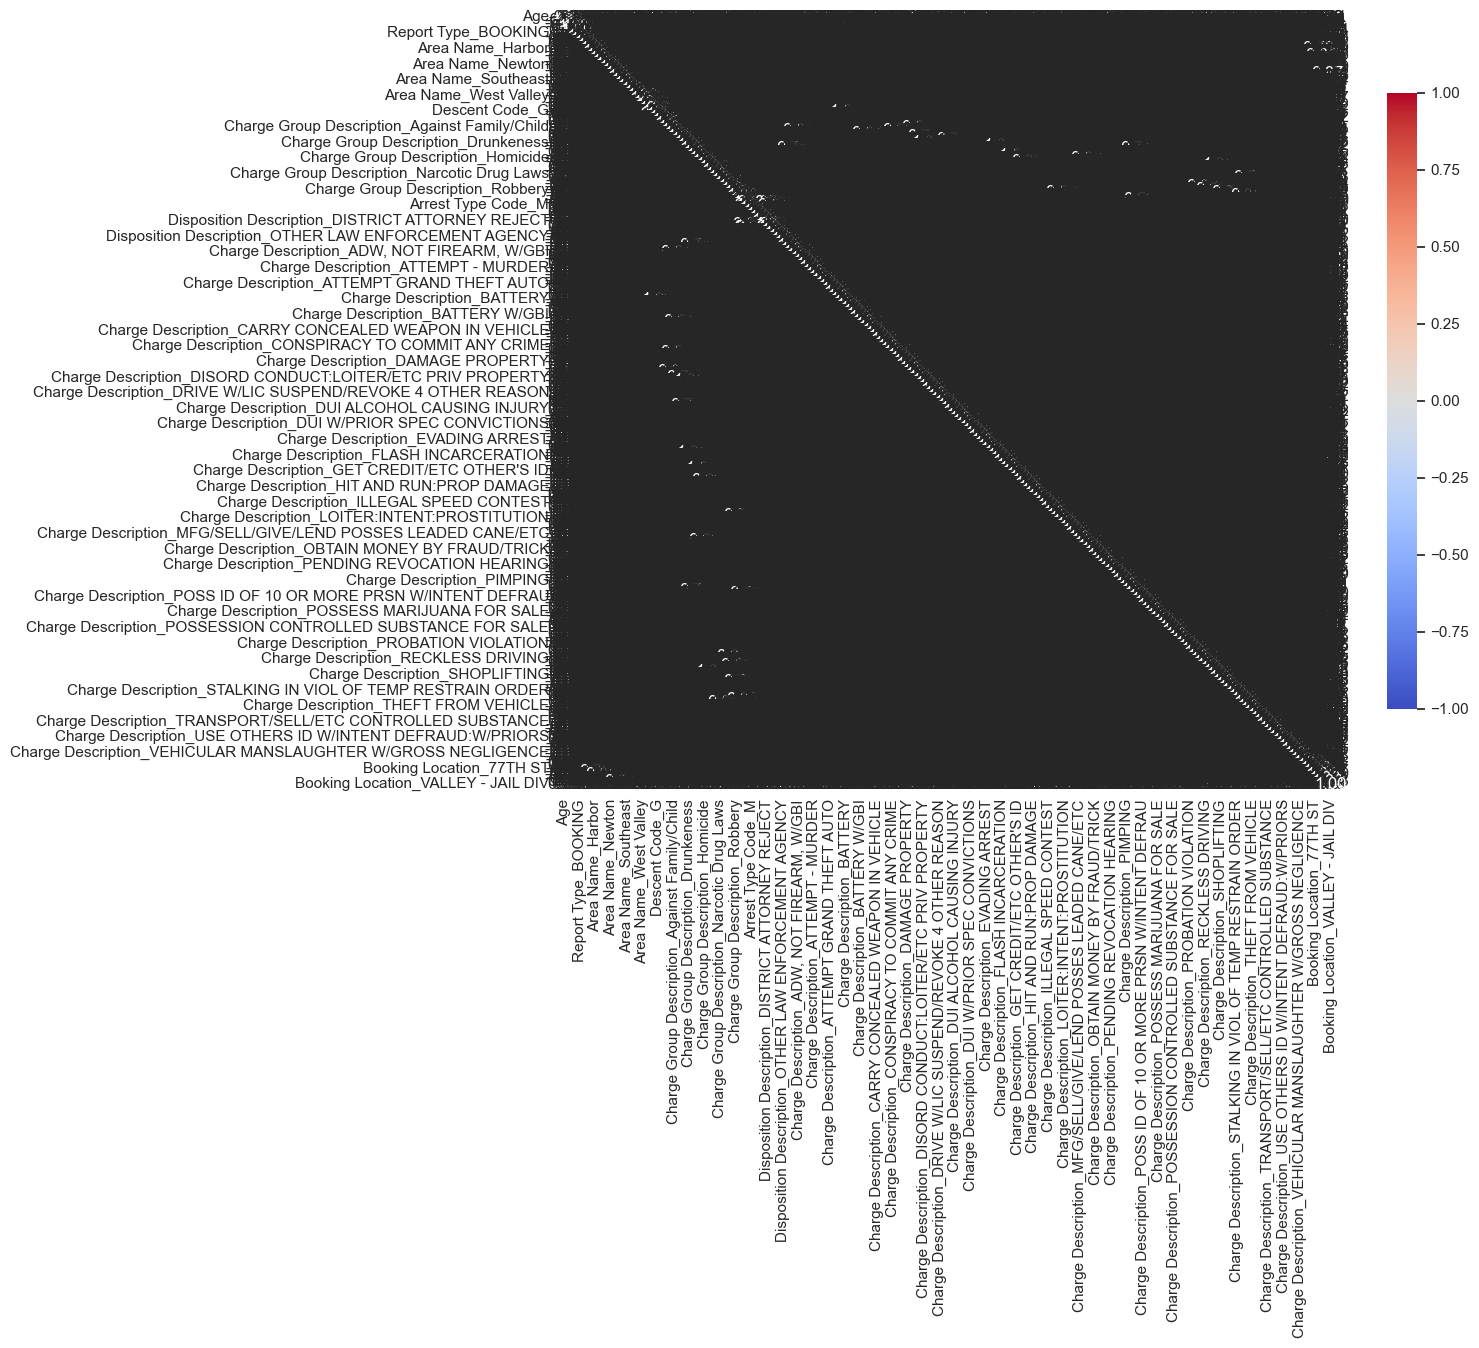

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": 0.8})
plt.show()


## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

In [29]:
df = pd.read_csv("Arrest_Data_from_2020_to_Present.csv")
df.head

<bound method NDFrame.head of         Report ID Report Type             Arrest Date    Time  Area ID  \
0         6636966     BOOKING  07/06/2023 12:00:00 AM  2250.0        8   
1         6637119     BOOKING  07/07/2023 12:00:00 AM  1000.0        3   
2         6624479     BOOKING  06/15/2023 12:00:00 AM  1850.0        7   
3         6636128     BOOKING  07/05/2023 12:00:00 AM  1550.0        2   
4         6636650     BOOKING  07/06/2023 12:00:00 AM  1335.0       12   
...           ...         ...                     ...     ...      ...   
334572    6959720     BOOKING  01/29/2025 12:00:00 AM  1345.0        1   
334573    6959415     BOOKING  01/28/2025 12:00:00 AM  1645.0        3   
334574    6960385     BOOKING  01/30/2025 12:00:00 AM  1030.0       15   
334575    6592975     BOOKING  04/25/2023 12:00:00 AM  1530.0        9   
334576    6961397     BOOKING  02/01/2025 12:00:00 AM   630.0        1   

          Area Name  Reporting District  Age Sex Code Descent Code  ...  \
0     

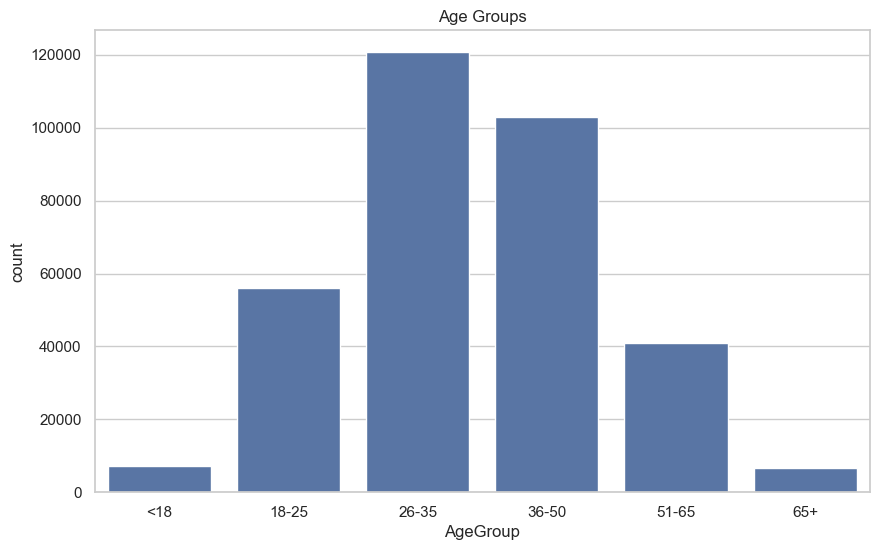

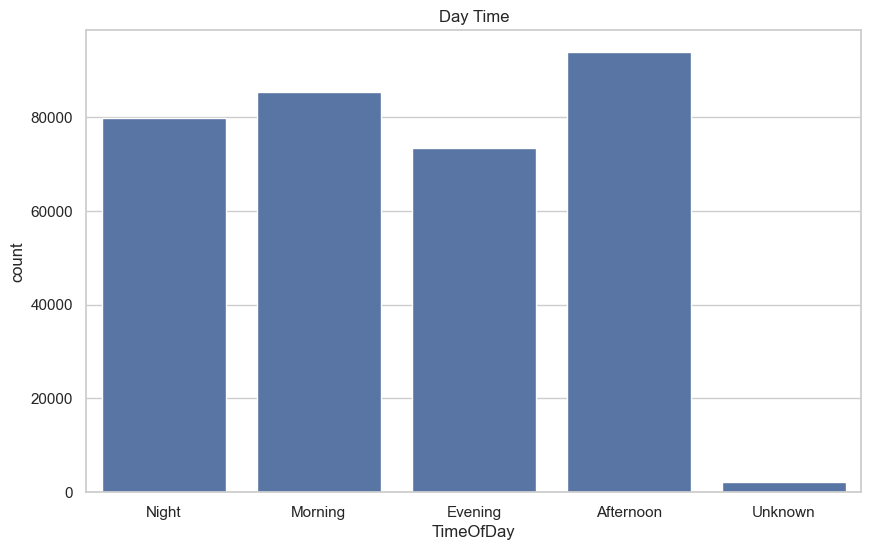

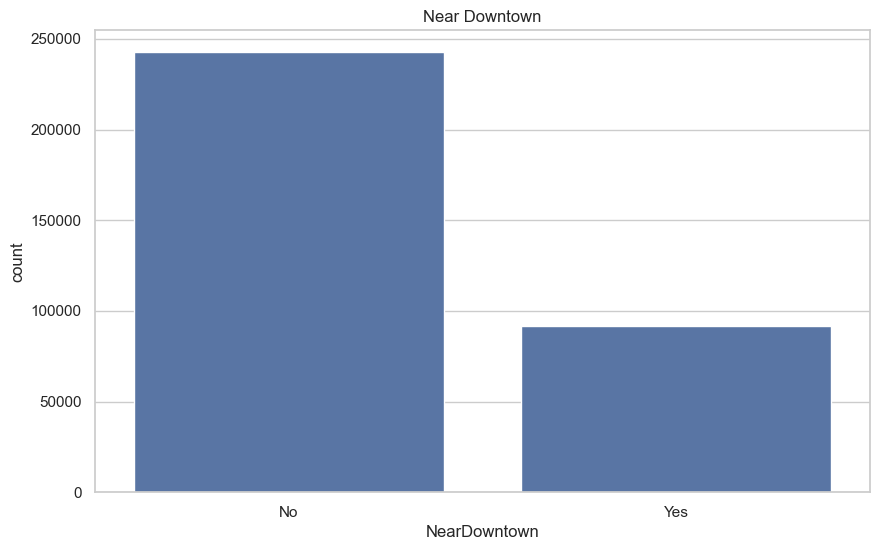

In [30]:
bins = [0, 17, 25, 35, 50, 65, 100]
labels = ['<18', '18-25', '26-35', '36-50', '51-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Time'] = pd.to_datetime(df['Time'], format='%H%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

def time_of_day(hour):
    if pd.isna(hour): return 'Unknown'
    elif 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)

df['NearDowntown'] = df.apply(lambda row:
    'Yes' if abs(row['LAT'] - 34.05) < 0.05 and abs(row['LON'] + 118.25) < 0.05 else 'No',
    axis=1)
sns.countplot(x='AgeGroup', data=df)
plt.title("Age Groups")
plt.show()

sns.countplot(x='TimeOfDay', data=df)
plt.title("Day Time")
plt.show()

sns.countplot(x='NearDowntown', data=df)
plt.title("Near Downtown")
plt.show()


## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

C:\Users\dimab\AppData\Local\Temp\ipykernel_16820\1023012630.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


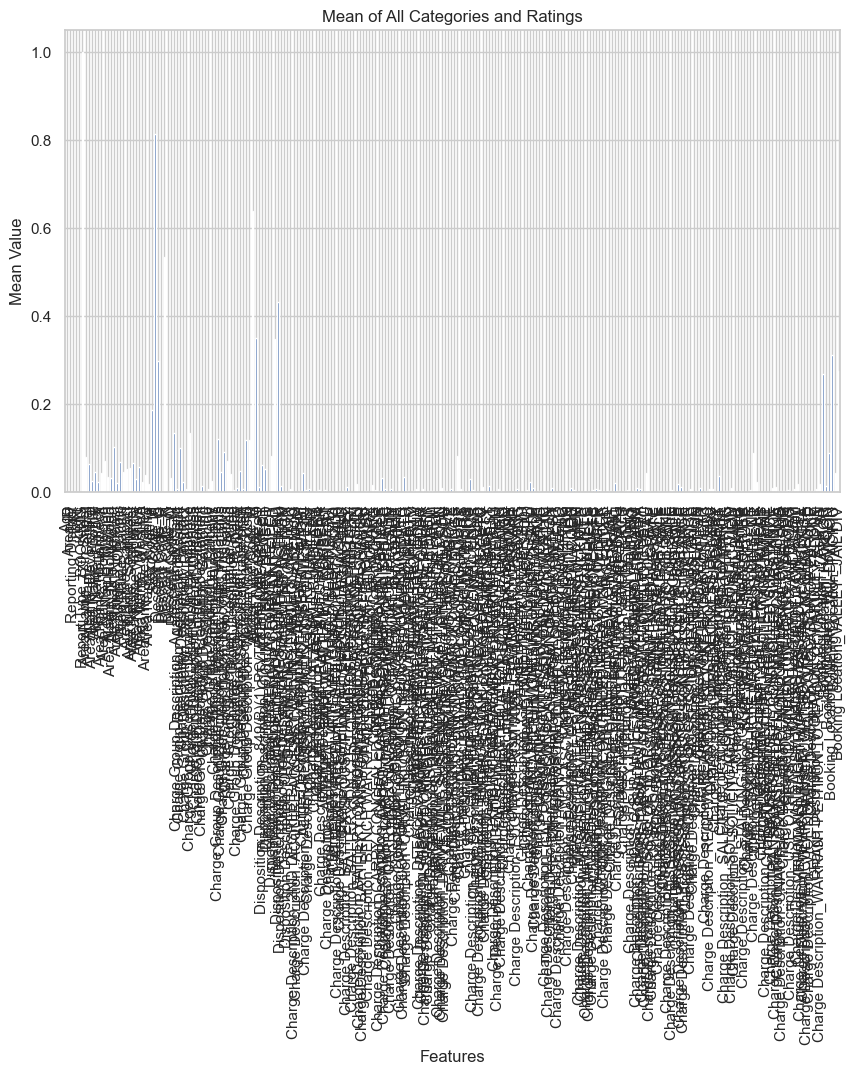

In [32]:
df = pd.read_csv("cleaned_dataset.csv")
mean_values = df.mean()
mean_values.plot(kind='bar', title='Mean of All Categories and Ratings')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
